<a href="https://colab.research.google.com/github/mariahjackson91/Stroke-Predictions/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns
from seaborn import heatmap

#import some necessary tools
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

#Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo- Data Science/Project 2/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Cleaning

In [4]:
# check missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# fix the missing values
df = df.fillna(df['bmi'].value_counts().index[0])

In [6]:
# check that missing values have been handled
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# check for data inconsistancies
for col in df:
  if df[col].dtype == 'object':
    print(col)
    print(df[col].unique())
    print()

gender
['Male' 'Female' 'Other']

ever_married
['Yes' 'No']

work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type
['Urban' 'Rural']

smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']



In [9]:
df['gender'].replace({'Male':0, 'Female':1, 'Other':2}, inplace=True)
df['gender'].value_counts()

1    2994
0    2115
2       1
Name: gender, dtype: int64

In [10]:
df['ever_married'].replace({'Yes':0, 'No':1}, inplace=True)
df['ever_married'].value_counts()

0    3353
1    1757
Name: ever_married, dtype: int64

In [11]:
df['Residence_type'].replace({'Urban':0, 'Rural':1}, inplace=True)
df['Residence_type'].value_counts()

0    2596
1    2514
Name: Residence_type, dtype: int64

In [12]:
df['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}, inplace=True)
df['smoking_status'].value_counts()

1    1892
3    1544
0     885
2     789
Name: smoking_status, dtype: int64

In [13]:
df['work_type'].replace({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4}, inplace=True)
df['work_type'].value_counts()

0    2925
1     819
3     687
2     657
4      22
Name: work_type, dtype: int64

In [14]:
# Examine the number of unique values in columns
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [15]:
# drop ID column
df.drop(columns= ['id'], inplace= True)

# Univariate Visuals

In [16]:
corr = df.corr()

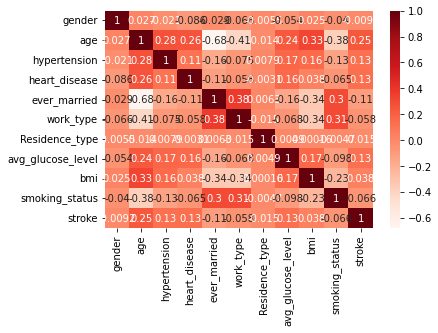

In [17]:
sns.heatmap(corr, cmap = 'Reds', annot= True)

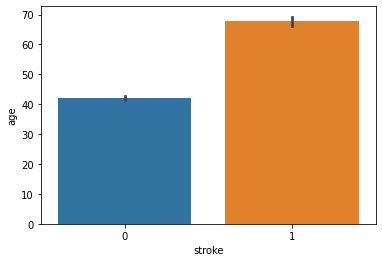

In [18]:
sns.barplot(data=df, x='stroke', y = 'age')

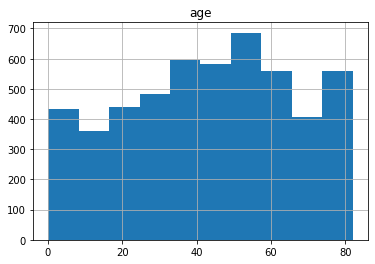

In [19]:
df.hist('age');

# Multivariate Exploratory Visuals

In [20]:
grouped_df = df.groupby('stroke', as_index=False).mean()

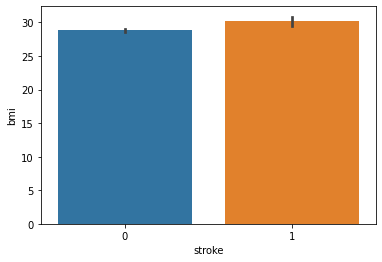

In [21]:
sns.barplot(data=df, x='stroke', y = 'bmi')

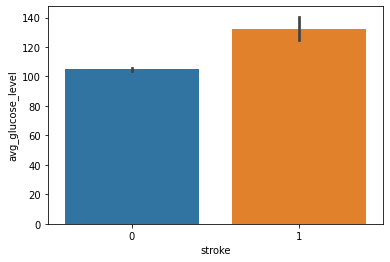

In [22]:
sns.barplot(data=df, x='stroke', y = 'avg_glucose_level')

Above: 2 Bar Graphs showing the correlation between (graph 1) bmi,  (graph 2) average glucose level and whether or not a person has a stoke. From looking at both graphs I am able to see that the higher a persons bmi and average glucose level is, the more likely they are to have a stroke 

# Preprocessing

In [23]:
# Assign your target vector and features matrix
y = df['stroke']
X = df.drop(columns = 'stroke')

In [24]:
# split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# make column selectors
cat_sel = make_column_selector(dtype_include='object')
num_sel = make_column_selector(dtype_include='number')

In [26]:
# instantiate imputers
med_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [27]:
# instantiate the ohe and the scaler
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

In [28]:
# build pipelines
cat_pipe = make_pipeline(freq_imputer, ohe)
num_pipe = make_pipeline(med_imputer, scaler)

In [29]:
# build tuples
cat_tuple = (cat_pipe, cat_sel)
num_tuple = (num_pipe, num_sel)

In [30]:
pp_col_trans = make_column_transformer(cat_tuple, num_tuple, remainder='passthrough')
pp_col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7d2bb5f10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._colum

In [31]:
pp_col_trans.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7d2bb5f10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._colum

In [32]:
# Model Predictions
train_pred = pp_col_trans.transform(X_train)
test_pred = pp_col_trans.transform(X_test)

# Classification Models

In [33]:
# Step 1: Imports (done at beginning)
# Step 2: Make an instance of the Model
dec_tree = DecisionTreeClassifier(random_state = 42)

In [34]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
dec_tree_pipe = make_pipeline(col_transformer, dec_tree)

In [35]:
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7d2bb5790>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
  

In [36]:
# Step 4: Predict the labels of new data
dec_tree_pipe.predict(X_test)

array([0, 0, 0, ..., 1, 1, 0])

In [37]:
# Step 5: Evaluate your model performance
# calculate classification accuracy
train_score = dec_tree_pipe.score(X_train, y_train)
test_score = dec_tree_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.9021909233176839


In [38]:
#Create a DecisionTreeClassifier model
dec_tree_pipe.fit(X_train, y_train)
dec_tree_pipe.predict(X_test)
dec_tree_pipe.score(X, y)

0.9755381604696673

In [39]:
# Step 1: Imports
# Step 2: Make an instance of the Model
rf = RandomForestClassifier(random_state = 42)

In [40]:
# Step 3: Create a modeling pipeline
rf_pipe = make_pipeline(col_transformer, rf)

In [41]:
# Step 4: Training the model on the data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7d2bb5790>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
  

In [42]:
# Step 5: Predict the labels of new data
rf_pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
# Step 6: Evaluate your model performance
# calculate classification accuracy
train_score = rf_pipe.score(X_train, y_train)
test_score = rf_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.9374021909233177


In [44]:
#Create a RandomForestClassifier model
rf = RandomForestClassifier(random_state = 42)
rf_pipe.fit(X_train, y_train)
rf_pipe.predict(X_test)
rf_pipe.score(X, y)

0.9843444227005871

In [45]:
# Step 1: Imports
# Step 2: Make an instance of the Model
bagclf = BaggingClassifier(random_state = 42)

In [46]:
# Step 3: Create a modeling pipeline
bagclf_pipe = make_pipeline(col_transformer, bagclf)

In [47]:
# Step 4: Training the model on the data
bagclf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7d2bb5790>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
  

In [48]:
# Step 5: Predict the labels of new data
bagclf_pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
# Step 6: Evaluate your model performance
# calculate classification accuracy
train_score = bagclf_pipe.score(X_train, y_train)
test_score = bagclf_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.9929540709812108
0.935054773082942


In [50]:
#Create a BaggedTreeClassifier model
bagclf_pipe.fit(X_train, y_train)
bagclf_pipe.predict(X_test)
bagclf_pipe.score(X, y)

0.9784735812133072

# Tuning

In [51]:
#create and visualize our parameter grid
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

pd.DataFrame(param_grid).T

,0,1,2
max_depth,1,2,3
min_samples_leaf,3,15,20
min_samples_split,2,10,100


In [52]:
scores = {}

#loop through all combinations of values for all hyperparameters
for d in param_grid['max_depth']:
  for l in param_grid['min_samples_leaf']:
    for s in param_grid['min_samples_split']:
      #fit a model for each combination of hyperparameter values
      dtmodel = DecisionTreeClassifier(max_depth=d,
                                     min_samples_leaf=l,
                                     min_samples_split=s)
      dtmodel.fit(X_train, y_train)
      score = dtmodel.score(X_test, y_test)
      #add the model accuracy to a dictionary with the parameter settings as the
      #keys and the accuracies as the values.
      scores[f'depth {d}, min_samples_leaf {l}, min_samples_split {s} accuracy'] = score.round(6) * 100

#display dictionary of scores
scores

{'depth 1, min_samples_leaf 3, min_samples_split 2 accuracy': 93.7402,
 'depth 1, min_samples_leaf 3, min_samples_split 10 accuracy': 93.7402,
 'depth 1, min_samples_leaf 3, min_samples_split 100 accuracy': 93.7402,
 'depth 1, min_samples_leaf 15, min_samples_split 2 accuracy': 93.7402,
 'depth 1, min_samples_leaf 15, min_samples_split 10 accuracy': 93.7402,
 'depth 1, min_samples_leaf 15, min_samples_split 100 accuracy': 93.7402,
 'depth 1, min_samples_leaf 20, min_samples_split 2 accuracy': 93.7402,
 'depth 1, min_samples_leaf 20, min_samples_split 10 accuracy': 93.7402,
 'depth 1, min_samples_leaf 20, min_samples_split 100 accuracy': 93.7402,
 'depth 2, min_samples_leaf 3, min_samples_split 2 accuracy': 93.7402,
 'depth 2, min_samples_leaf 3, min_samples_split 10 accuracy': 93.7402,
 'depth 2, min_samples_leaf 3, min_samples_split 100 accuracy': 93.7402,
 'depth 2, min_samples_leaf 15, min_samples_split 2 accuracy': 93.7402,
 'depth 2, min_samples_leaf 15, min_samples_split 10 accur

In [53]:
dtparam_grid2 = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 7]}

dt_grid_search2 = GridSearchCV(dtmodel, dtparam_grid2)
dt_grid_search2.fit(X_train, y_train)
dt_grid_search2.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [54]:
#retrieve the best version of the model
best_model = dt_grid_search2.best_estimator_

#refit the model on the whole training set
best_model.fit(X_train, y_train)
#score the model on the test set
best_model.score(X_test, y_test)

0.9381846635367762

In [55]:
scores = {}

#loop through all combinations of values for all hyperparameters
for d in param_grid['max_depth']:
  for l in param_grid['min_samples_leaf']:
    for s in param_grid['min_samples_split']:
      #fit a model for each combination of hyperparameter values
      rfmodel = RandomForestClassifier(max_depth=d,
                                     min_samples_leaf=l,
                                     min_samples_split=s)
      rfmodel.fit(X_train, y_train)
      score = rfmodel.score(X_test, y_test)
      #add the model accuracy to a dictionary with the parameter settings as the
      #keys and the accuracies as the values.
      scores[f'depth {d}, min_samples_leaf {l}, min_samples_split {s} accuracy'] = score.round(6) * 100

#display dictionary of scores
scores

{'depth 1, min_samples_leaf 3, min_samples_split 2 accuracy': 93.7402,
 'depth 1, min_samples_leaf 3, min_samples_split 10 accuracy': 93.7402,
 'depth 1, min_samples_leaf 3, min_samples_split 100 accuracy': 93.7402,
 'depth 1, min_samples_leaf 15, min_samples_split 2 accuracy': 93.7402,
 'depth 1, min_samples_leaf 15, min_samples_split 10 accuracy': 93.7402,
 'depth 1, min_samples_leaf 15, min_samples_split 100 accuracy': 93.7402,
 'depth 1, min_samples_leaf 20, min_samples_split 2 accuracy': 93.7402,
 'depth 1, min_samples_leaf 20, min_samples_split 10 accuracy': 93.7402,
 'depth 1, min_samples_leaf 20, min_samples_split 100 accuracy': 93.7402,
 'depth 2, min_samples_leaf 3, min_samples_split 2 accuracy': 93.7402,
 'depth 2, min_samples_leaf 3, min_samples_split 10 accuracy': 93.7402,
 'depth 2, min_samples_leaf 3, min_samples_split 100 accuracy': 93.7402,
 'depth 2, min_samples_leaf 15, min_samples_split 2 accuracy': 93.7402,
 'depth 2, min_samples_leaf 15, min_samples_split 10 accur

In [56]:
rfmodel = RandomForestClassifier()

param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

In [57]:
rf_grid_search = GridSearchCV(rfmodel, param_grid)

In [58]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [59]:
rf_grid_search.best_params_

{'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [60]:
rfparam_grid2 = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 7]}

rf_grid_search2 = GridSearchCV(rfmodel, rfparam_grid2)
rf_grid_search2.fit(X_train, y_train)
rf_grid_search2.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [61]:
#retrieve the best version of the model
best_model = rf_grid_search2.best_estimator_

#refit the model on the whole training set
best_model.fit(X_train, y_train)
#score the model on the test set
best_model.score(X_test, y_test)

0.9374021909233177

In [62]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [63]:
pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [64]:
knn_pipe_gs = GridSearchCV(knn_pipe, pipe_param_grid)

knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.9374021909233177


# PCA

In [65]:
# We must scale the data for use in PCA (done earlier)

# We are asking for the number of Principal Components that will retain 95% of the variance in the original features
pca = PCA(n_components = .95)

# Preprocessing Pipeline, so we can reuse it for other model types:
# We have only numeric data, so there is no need for a column transformer.  
# We can perform the same processing steps on all columns.
processing = make_pipeline(scaler, pca)

print('Shape before PCA:', X_train.shape)
print('Shape after PCA:', processing.fit_transform(X_train).shape)
print('Column count reduced by: ', X_train.shape[1] - processing.fit_transform(X_train).shape[1])

Shape before PCA: (3832, 10)
Shape after PCA: (3832, 9)
Column count reduced by:  1


In [66]:
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train)))
  print('Test Report:', classification_report(y_test, model.predict(X_test)))

  cm = confusion_matrix(y_test, model.predict(X_test))

  plt.figure(figsize=(15, 15))
  heatmap(cm, annot=True)
  plt.xlabel('Predicted', fontsize=40)
  plt.ylabel('True', fontsize=40)
  plt.show()

In [67]:
%%time
# Without PCA
knn = KNeighborsClassifier()

# Now we will build the pipeline
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

CPU times: user 14.8 ms, sys: 9.99 ms, total: 24.8 ms
Wall time: 15.2 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3663
           1       0.77      0.06      0.11       169

    accuracy                           0.96      3832
   macro avg       0.86      0.53      0.54      3832
weighted avg       0.95      0.96      0.94      3832

Test Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.20      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.57      0.50      0.49      1278
weighted avg       0.89      0.94      0.91      1278



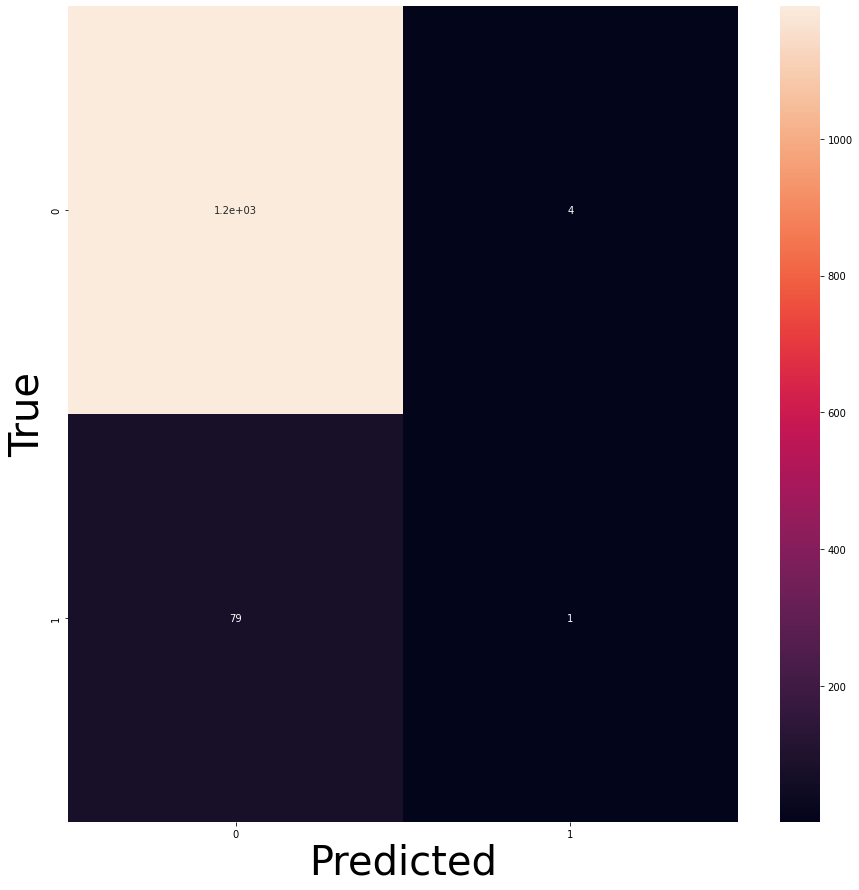

CPU times: user 726 ms, sys: 152 ms, total: 878 ms
Wall time: 749 ms


In [68]:
%%time
# evaluate the pipeline
eval_classification(knn_pipe, X_train, X_test, y_train, y_test)

In [69]:
%%time
# With PCA
# Now we will build the pipeline
knn_pca_pipe = make_pipeline(scaler, pca, knn)

# fit the pipeline
knn_pca_pipe.fit(X_train, y_train)

CPU times: user 17.7 ms, sys: 9 ms, total: 26.7 ms
Wall time: 20.7 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3663
           1       0.71      0.03      0.06       169

    accuracy                           0.96      3832
   macro avg       0.84      0.51      0.52      3832
weighted avg       0.95      0.96      0.94      3832

Test Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



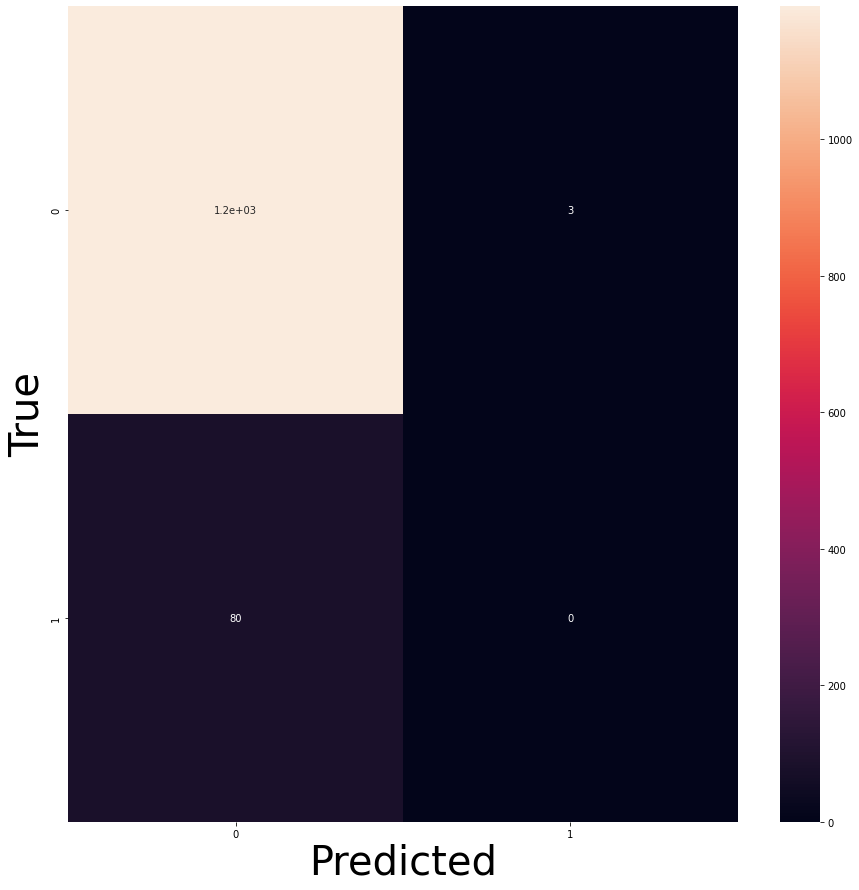

CPU times: user 640 ms, sys: 203 ms, total: 843 ms
Wall time: 633 ms


In [70]:
%%time
# evaluate the pipeline

eval_classification(knn_pca_pipe, X_train, X_test, y_train, y_test)

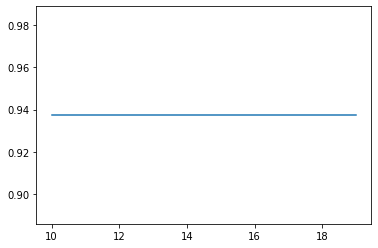

In [71]:
ks = range(10,20)

accuracies = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors = k)

  # Now we will build the pipeline
  knn_pca_pipe = make_pipeline(scaler, pca, knn)

  # fit the pipeline
  knn_pca_pipe.fit(X_train, y_train)

  accuracies.append(knn_pca_pipe.score(X_test, y_test))

plt.plot(ks, accuracies)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3663
           1       0.00      0.00      0.00       169

    accuracy                           0.96      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.91      0.96      0.93      3832

Test Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



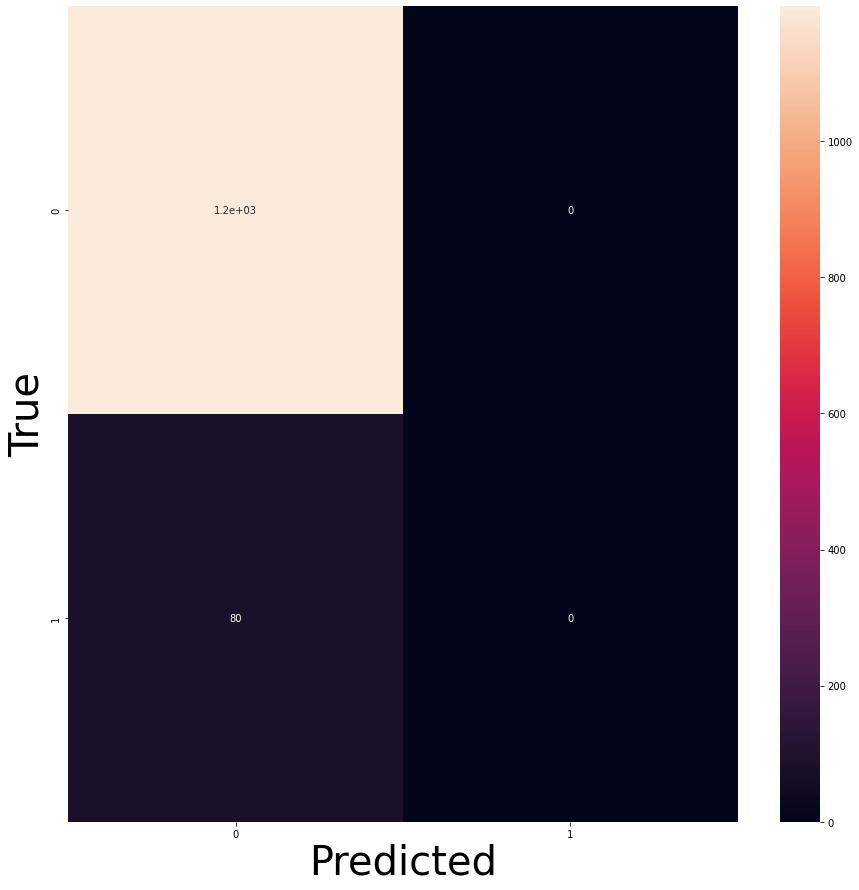

CPU times: user 774 ms, sys: 133 ms, total: 908 ms
Wall time: 781 ms


In [72]:
%%time
knn = KNeighborsClassifier(n_neighbors = 11)

# Now we will build the pipeline
knn_pca_pipe = make_pipeline(scaler, knn)

# fit the pipeline
knn_pca_pipe.fit(X_train, y_train)

eval_classification(knn_pca_pipe,X_train,X_test, y_train, y_test)

# Classification Metrics

In [73]:
# accuracy score for decision tree model
test_preds_dec= dec_tree_pipe.predict(X_test) 
accuracy_score(y_test, test_preds_dec)

0.9021909233176839

In [74]:
# accuracy for random forest model
test_preds_rf= rf_pipe.predict(X_test)
accuracy_score(y_test, test_preds_rf)

0.9374021909233177

In [75]:
# accuracy for bagged tree model
test_preds_bagclf= bagclf_pipe.predict(X_test)
accuracy_score(y_test, test_preds_bagclf)

0.935054773082942

In [76]:
#Print the recall score of Decision model.
recall_score(y_test, test_preds_dec)

0.1375

In [77]:
# print the recall score of Random Forest model
recall_score(y_test, test_preds_rf)

0.0

In [78]:
# print the recall score of Bagged Tree model
recall_score(y_test, test_preds_bagclf)

0.0375

In [79]:
#Print the precision scores of decision model.
precision_score(y_test, test_preds_dec)

0.16417910447761194

In [80]:
#Print the precision scores of random forest model.
precision_score(y_test, test_preds_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [81]:
#Print the precision scores of bagged model.
precision_score(y_test, test_preds_bagclf)

0.3333333333333333

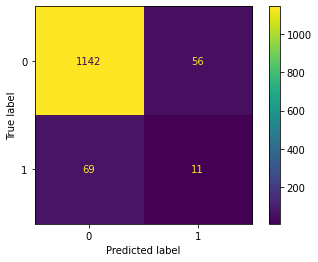

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_dec)

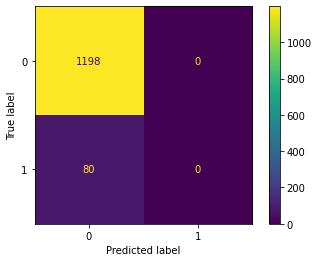

In [83]:
# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_rf)

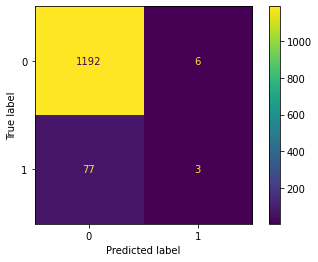

In [84]:
# Bagged Tree Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_bagclf)

In [85]:
#Use classifiction_report() to print a report of several metrics for all classes at once

classification_report(y_test, test_preds_dec)

'              precision    recall  f1-score   support\n\n           0       0.94      0.95      0.95      1198\n           1       0.16      0.14      0.15        80\n\n    accuracy                           0.90      1278\n   macro avg       0.55      0.55      0.55      1278\nweighted avg       0.89      0.90      0.90      1278\n'

In [86]:
classification_report(y_test, test_preds_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97      1198\n           1       0.00      0.00      0.00        80\n\n    accuracy                           0.94      1278\n   macro avg       0.47      0.50      0.48      1278\nweighted avg       0.88      0.94      0.91      1278\n'

In [87]:
classification_report(y_test, test_preds_bagclf)

'              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.97      1198\n           1       0.33      0.04      0.07        80\n\n    accuracy                           0.94      1278\n   macro avg       0.64      0.52      0.52      1278\nweighted avg       0.90      0.94      0.91      1278\n'

# Analysis

After completing decision treeclassifier, random forest classifier, and bagged tree classifier models it is shown that random forest is not the proper model to  use for this data set. This is because  it has a recall score of 0.0. Therefore the best model is between the Decision Tree Classifier and the Bagged Tree Classifier. Out of those 2 models the Bagged Tree Classifier is the better model due to having the better testing score as well as classification metrics.